# Notebook

In [162]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

## ETL

### Extract

In [163]:
# Data extraction.
data = fetch_california_housing()

df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['Price'] = data['target']

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<AxesSubplot:xlabel='HouseAge', ylabel='Count'>

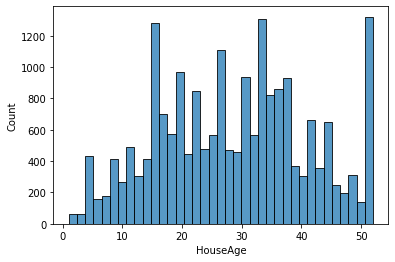

In [164]:
sns.histplot(df['HouseAge'])

### Transform

In [165]:
# Which columns have exceding large difference between max and min?
display(df.describe().round())

threshold = 10.0
list_large_diff = []

for i in df.columns:
    if np.abs(df[i].max()) - np.abs(df[i].min()) > threshold:
        list_large_diff.append(i)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,4.0,29.0,5.0,1.0,1425.0,3.0,36.0,-120.0,2.0
std,2.0,13.0,2.0,0.0,1132.0,10.0,2.0,2.0,1.0
min,0.0,1.0,1.0,0.0,3.0,1.0,33.0,-124.0,0.0
25%,3.0,18.0,4.0,1.0,787.0,2.0,34.0,-122.0,1.0
50%,4.0,29.0,5.0,1.0,1166.0,3.0,34.0,-118.0,2.0
75%,5.0,37.0,6.0,1.0,1725.0,3.0,38.0,-118.0,3.0
max,15.0,52.0,142.0,34.0,35682.0,1243.0,42.0,-114.0,5.0


<AxesSubplot:xlabel='HouseAge', ylabel='Count'>

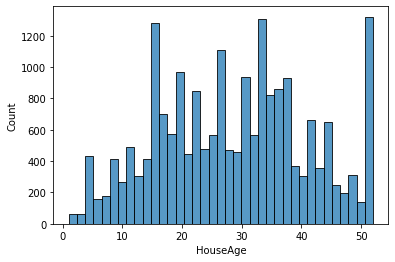

In [166]:
# HouseAge seems faily distributed...
sns.histplot(df['HouseAge'])

In [167]:
list_large_diff.remove('HouseAge')
print(list_large_diff)

['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


How to deal with the scalling?

Almost all variables have a relevant difference between the max and min values. One way to deal with it is to establish a top value (i.e. truncate). In this exercise the top value will be the 90 percentile.

obs: Latitude, Longitude and HouseAge will not be submitted to such treatment.

In [168]:
# Excluding the 

# Establishing the top-value
for i in list_large_diff:
    df[i] = np.where(df[i] > np.percentile(df[i], 90), np.percentile(df[i], 90), df[i])

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.690608,28.639486,5.226731,1.052095,1293.456977,2.857335,35.631861,-119.569704,2.068558
std,1.430461,12.585558,1.098748,0.073290,674.438373,0.607750,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,6.159210,52.000000,6.961188,1.172727,2566.000000,3.885273,41.950000,-114.310000,5.000010


In [169]:
# Separating the data
X = df.drop(columns='Price')

# Applying scalling.
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X)
X.columns = df.drop(columns='Price').columns

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.000000,0.784314,1.000000,0.822589,0.124464,0.583548,0.567481,0.211155
1,1.000000,0.392157,0.881759,0.760724,0.935622,0.443955,0.565356,0.212151
2,1.000000,1.000000,1.000000,0.881723,0.192353,0.660813,0.564293,0.210159
3,0.908803,1.000000,0.812947,0.881262,0.216543,0.581164,0.564293,0.209163
4,0.591291,1.000000,0.888908,0.890819,0.219274,0.466388,0.564293,0.209163


## PCA

<AxesSubplot:>

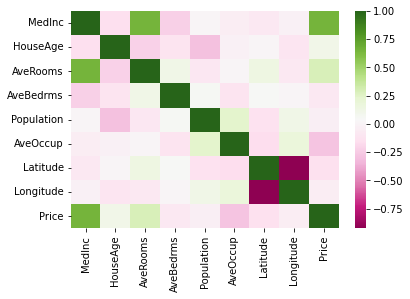

In [170]:
sns.heatmap(df.corr(), cmap="PiYG")

What to expect?

- `MedInc` and `AveRooms` seemns to be strongly correlated, therefore it is expected both will heavily compose a Principal Component (PC). Similary, `Latitude` and `Longitude` are obviously correlated. 
- `Population` and `HouseAge` seem to be moderately correlated.
- `AveOccup` appears to to be lacking in correlation with other variables, for which it is expected a single PC composed exclusively by `AveOccup`.

### Sklearn implementation

In [171]:
# PCA in action.
pca = PCA(n_components=2, random_state=52).fit(X)

X_pca_sklearn = pca.transform(X)
X_pca_sklearn

array([[ 0.47126761, -0.49013236],
       [-0.07859017, -0.60245831],
       [ 0.50114997, -0.40388562],
       ...,
       [ 0.36046639, -0.0106948 ],
       [ 0.43424345, -0.03933915],
       [ 0.23077162, -0.0978723 ]])

In [172]:
print(f'''
Eigenvectors or the resulting axis:
{pca.components_}

How much variance each PC contains:
{pca.explained_variance_}
''')


Eigenvectors or the resulting axis:
[[-0.18501626  0.38284795 -0.03694797  0.00093112 -0.53065954 -0.20060987
   0.52857014 -0.46540322]
 [-0.69156065  0.36538093 -0.47578681  0.01541051 -0.01566049  0.08968116
  -0.28983819  0.26331717]]

How much variance each PC contains:
[0.10110964 0.08796109]



<AxesSubplot:>

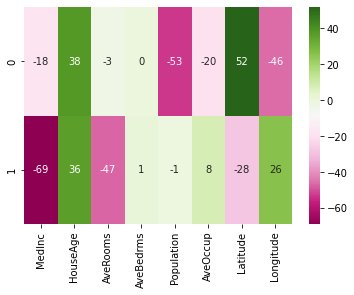

In [173]:
# Eigenvector can also give an idea of how much each variables contributed to every Principal Component.
x_labels = df.drop(columns='Price').columns
sns.heatmap((pca.components_ * 100).astype(int),
            annot=True,
            cmap="PiYG",
            xticklabels=x_labels)

Results

Based on 3 Principal Components, the expected results turned into reality: 
- PC 0: `Latitude` and `Longitude` 
- PC 1: `MedInc` and `AveRooms`

In other hand, the relevant position of `Population` in PC 0 and `HouseAge` in PC 1 were not expected.



#### Example: single PC

In [174]:
# Preparing the data for a single PC.
example1_col = ['MedInc', 'AveRooms']
X1 = X[example1_col]

X1.sample(5)

,MedInc,AveRooms
2675,0.513119,0.823428
16239,0.317742,0.821153
5588,0.442775,0.531339
9342,1.000000,1.000000
6221,0.827680,0.849644


In [175]:
X1.corr()

,MedInc,AveRooms
MedInc,1.000000,0.653502
AveRooms,0.653502,1.000000


In [176]:
# PCA in example 1.
pca1 = PCA(n_components=1, random_state=52).fit(X1)
print(pca1.components_)

X1['PC_sklearn'] = pca1.transform(X1)
X1.sample(5)

[[-0.85730958 -0.51480121]]


C:\Users\Kenji\AppData\Local\Temp\ipykernel_12768\2374392989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['PC_sklearn'] = pca1.transform(X1)


,MedInc,AveRooms,PC_sklearn
20374,0.834042,0.837515,-0.294052
11117,0.708797,0.583502,-0.055912
18033,1.000000,0.927286,-0.482544
2948,0.075787,0.563049,0.497303
19120,0.356987,0.621181,0.226300


Discover

The PC loadings turn out to be all negative. Does it mean that is PC is negatively correlated to `MedInc` and `AveRooms`? No, and the simple explanation would be that both equations below are the same:

equation 1: $variable * +loadings = +score$

equation 2: $variable * -loadings = -score$

For more information, check this [post](!https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers).

In [177]:
# Adjustment in sign to allow a better interpretation
X1['PC_sklearn_neg'] = - X1['PC_sklearn']
X1.sample(5)

C:\Users\Kenji\AppData\Local\Temp\ipykernel_12768\3188970629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['PC_sklearn_neg'] = - X1['PC_sklearn']


,MedInc,AveRooms,PC_sklearn,PC_sklearn_neg
12610,0.614792,0.838996,-0.106850,0.106850
6390,1.000000,1.000000,-0.519977,0.519977
2940,0.258212,0.571880,0.336361,-0.336361
8638,1.000000,0.772819,-0.403024,0.403024
19989,0.105366,0.530904,0.488492,-0.488492


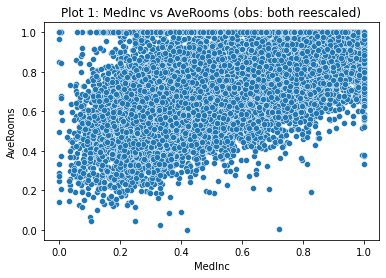

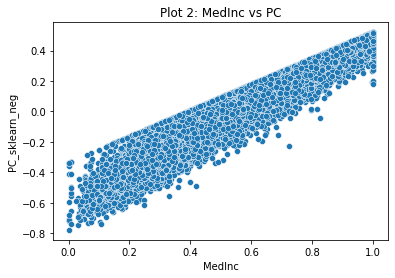

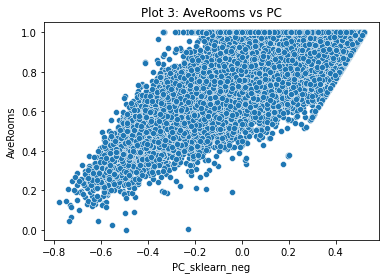

In [178]:
# Checking the results
fig1 = sns.scatterplot(data=X1, x='MedInc', y='AveRooms').set(title='Plot 1: MedInc vs AveRooms (obs: both reescaled)')
plt.show()

fig2 = sns.scatterplot(data=X1, x='MedInc', y='PC_sklearn_neg').set(title='Plot 2: MedInc vs PC')
plt.show()

fig3 = sns.scatterplot(data=X1, x='PC_sklearn_neg', y='AveRooms').set(title='Plot 3: AveRooms vs PC')
plt.show()


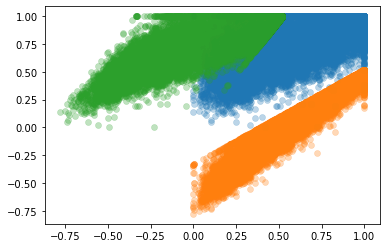

In [179]:
# Check all variables together.
#px.scatter_3d(X1, x='MedInc', y='PC', z='AveRooms')

plt.scatter(X1['MedInc'], X1['AveRooms'], linewidth=0.5, alpha=.3)
plt.scatter(X1['MedInc'], X1['PC_sklearn_neg'], linewidth=0.5, alpha=.3)
plt.scatter(X1['PC_sklearn_neg'], X1['AveRooms'], linewidth=0.5, alpha=.3)

#### Example: two PC

In [180]:
# Preparing the data for a double PC.
example2_col = ['MedInc', 'AveRooms', 'Population']
X2 = X[example2_col]

array([[-0.844327  , -0.51714424,  0.14026311],
       [-0.15922468, -0.00779604, -0.98721159]])

<AxesSubplot:xlabel='PC0_sklearn', ylabel='PC1_sklearn'>

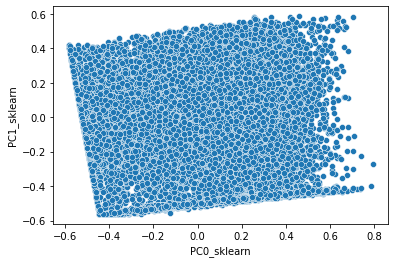

In [181]:
# Reexecuting sklearn implementation with smaller sample.
pca2 = PCA(n_components=2, random_state=52).fit(X2)
display(pca2.components_)

df_pca2 = pd.DataFrame(pca2.transform(X2), columns=['PC0_sklearn', 'PC1_sklearn'])
X2 = pd.concat([X2, df_pca2], axis=1)

# Plot
sns.scatterplot(x=X2['PC0_sklearn'], y=X2['PC1_sklearn'])

### Manual implementation

In [182]:
# All possible cominations of Principal Component loadings (or coefficients) for MedInc and AveRooms.
n_loadings = 2
learning_rate = 0.01
steps = np.arange(-1, 1, learning_rate)

all_combinations = np.array(list(product(steps, repeat=n_loadings))).round(2)
df_comb = pd.DataFrame(all_combinations)

# Applying the condition: a**2 + b**2 = 1
df_comb['square_sum'] = df_comb.iloc[:, 0] ** 2 + df_comb.iloc[:, 1] ** 2
df_valid_comb = df_comb.loc[df_comb['square_sum'] == 1]
    
print(f"Valid combinations: {len(df_valid_comb)}")
df_valid_comb[:5]

Valid combinations: 18


,0,1,square_sum
100,-1.00,0.00,1.0
872,-0.96,-0.28,1.0
928,-0.96,0.28,1.0
4040,-0.80,-0.60,1.0
4160,-0.80,0.60,1.0


In [183]:
# Identify which subset of loadings will achieve the bigger variance: PC 0
best_combination = np.array([])
best_var = 0

for i in tqdm(np.array(df_valid_comb.iloc[:, :n_loadings])):
    var = (i * (X1[['MedInc', 'AveRooms']] - X1[['MedInc', 'AveRooms']].mean())).sum(axis=1).var()
    if (var > best_var):
        best_combination = i
        best_var = var

best_combination, best_var

100%|██████████| 18/18 [00:00<00:00, 692.31it/s]


(array([-0.8, -0.6]), 0.08100388660702089)

C:\Users\Kenji\AppData\Local\Temp\ipykernel_12768\3928947755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['PC_manual'] = (best_combination * (X1[['MedInc', 'AveRooms']] - X1[['MedInc', 'AveRooms']].mean())).sum(axis=1)


Text(0, 0.5, 'PC scores')

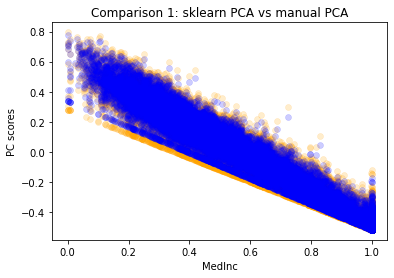

In [184]:
# Comparing the sklearn implementation vs manual implementation
X1['PC_manual'] = (best_combination * (X1[['MedInc', 'AveRooms']] - X1[['MedInc', 'AveRooms']].mean())).sum(axis=1)


plt.scatter(X1['MedInc'], X1['PC_manual'], linewidth=0.5, alpha=.2, color='orange')
plt.scatter(X1['MedInc'], X1['PC_sklearn'], linewidth=0.5, alpha=.2, color='blue')
plt.title('Comparison 1: sklearn PCA vs manual PCA')
plt.xlabel('MedInc')
plt.ylabel('PC scores')

Comparison 1

Considering a single PC based on `MedInc` and `AveRooms`, we just compared the scores resulted from sklearn implementation (blue) and the manual implementation (orange). From the image above it is clear how similar both are, being slighty different because of the numeric roundings.

In [185]:
# All possible cominations of Principal Component loadings (or coefficients) for MedInc and AveRooms.
n_loadings = 3
learning_rate = 0.01
steps = np.arange(-1, 1, learning_rate)

all_combinations = np.array(list(product(steps, repeat=n_loadings))).round(2)
df_comb = pd.DataFrame(all_combinations)

# Applying the condition: a**2 + b**2 + c**2 = 1
df_comb['square_sum'] = df_comb.iloc[:, 0] ** 2 + df_comb.iloc[:, 1] ** 2 + df_comb.iloc[:, 2] ** 2
df_valid_comb = df_comb.loc[df_comb['square_sum'] == 1]
    
print(f"Valid combinations: {len(df_valid_comb)}")
df_valid_comb[:5]

Valid combinations: 147


,0,1,2,square_sum
20100,-1.00,0.00,0.00,1.0
174500,-0.96,-0.28,0.00,1.0
180072,-0.96,0.00,-0.28,1.0
180128,-0.96,0.00,0.28,1.0
185700,-0.96,0.28,0.00,1.0


In [186]:
# Identify which subset of loadings will achieve the bigger variance: PC 0
best_combination = np.array([])
best_var = 0

for i in tqdm(np.array(df_valid_comb.iloc[:, :n_loadings])):
    var = (i * (X2[['MedInc', 'AveRooms', 'Population']] - X2[['MedInc', 'AveRooms', 'Population']].mean())).sum(axis=1).var()
    if (var > best_var):
        best_combination = i
        best_var = var

best_combination, best_var

100%|██████████| 147/147 [00:00<00:00, 717.07it/s]


(array([-0.8 , -0.48,  0.36]), 0.08127984581651504)

In [187]:
# Identify which subset of loadings will achieve the secong biggest variance: PC 1
second_best_combination = np.array([])
second_best_var = 0

for i in tqdm(np.array(df_valid_comb.iloc[:, :n_loadings])):
    var = (i * (X2[['MedInc', 'AveRooms', 'Population']] - X2[['MedInc', 'AveRooms', 'Population']].mean())).sum(axis=1).var()
    
    # Condition 1: big var.
    if (var > second_best_var):

        # Condition 2: combination must be the second biggest var.
        if (any(np.abs(i) != np.abs(best_combination))):

            # Condition 3: eigenvector must be orthogonal.
            if (np.dot(i, best_combination) == 0):
                second_best_combination = i
                second_best_var = var

second_best_combination, second_best_var

100%|██████████| 147/147 [00:00<00:00, 713.59it/s]


(array([ 0. , -0.6, -0.8]), 0.05162447104645403)

<AxesSubplot:xlabel='PC0_manual', ylabel='PC1_manual'>

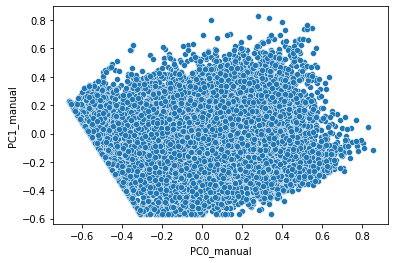

In [190]:
# Organizing the manual calculations on a single dataframe
X2['PC0_manual'] = (best_combination * (X2[['MedInc', 'AveRooms', 'Population']] - X2[['MedInc', 'AveRooms', 'Population']].mean())).sum(axis=1)
X2['PC1_manual'] = (second_best_combination * (X2[['MedInc', 'AveRooms', 'Population']] - X2[['MedInc', 'AveRooms', 'Population']].mean())).sum(axis=1)

# Plot
sns.scatterplot(data=X2, x='PC0_manual', y='PC1_manual')

Text(0, 0.5, 'PC1 scores')

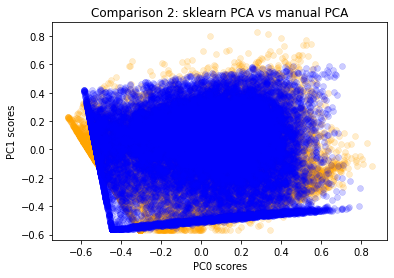

In [194]:
# Comparing the sklearn implementation vs manual implementation
plt.scatter(X2['PC0_manual'], X2['PC1_manual'], linewidth=0.5, alpha=.2, color='orange')
plt.scatter(X2['PC0_sklearn'], X2['PC1_sklearn'], linewidth=0.5, alpha=.2, color='blue')
plt.title('Comparison 2: sklearn PCA vs manual PCA')
plt.xlabel('PC0 scores')
plt.ylabel('PC1 scores')

Comparison 2

Again, we are comparing sklearn PCA and manual PCA with three variables: `MedInc`, `AveRooms` and `Population`. The image above shows two forms that are overall similar, although the difference is much more visible.